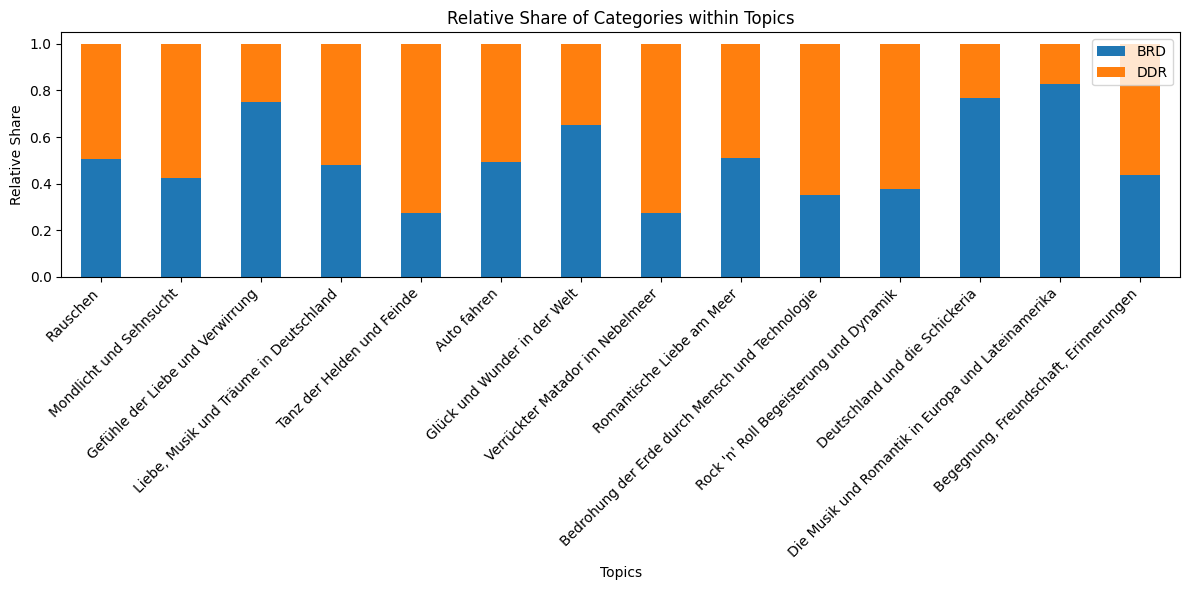

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = "songs_with_topic.csv"
df = pd.read_csv(csv_file_path)
# Assuming you have a DataFrame named 'df' with columns "Category" and "Topic"


# Group the data by "Topic" and "Category", and then calculate the relative share
grouped = df.groupby(['topic_prediction', 'Category']).size().unstack().fillna(0)
grouped['Total'] = grouped['BRD'] + grouped['DDR']
grouped['BRD_Relative'] = grouped['BRD'] / grouped['Total']
grouped['DDR_Relative'] = grouped['DDR'] / grouped['Total']

# Calculate total share of each topic
topic_total_share = grouped.groupby('topic_prediction')['Total'].sum()

# Sort topics based on total share
sorted_topics = topic_total_share.sort_values(ascending=False).index

# Reorder the grouped DataFrame based on sorted topics
grouped_sorted = grouped.loc[sorted_topics]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

grouped_sorted[['BRD_Relative', 'DDR_Relative']].plot(kind='bar', stacked=True, ax=ax)
plt.title('Relative Share of Categories within Topics')
plt.ylabel('Relative Share')
plt.xlabel('Topics')
plt.xticks(rotation=45, ha='right')
plt.legend(["BRD", "DDR"], loc="upper right")

plt.tight_layout()
plt.show()

# Topic Distribution

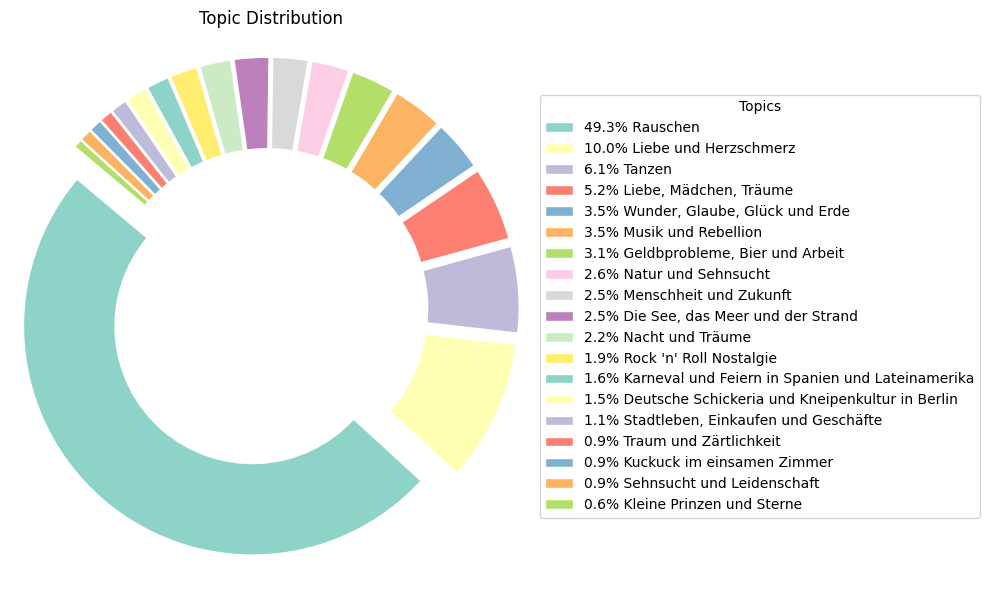

In [17]:
topic_counts = df['topic_prediction'].value_counts(normalize=True)

# Plotting

explode = [0.1] * len(topic_counts)  # Explode all slices for emphasis

num_topics = len(topic_counts)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.Set3.colors  # Using a color palette

# Create the pie chart with percentage labels
wedges, texts, autotexts = ax.pie(
    topic_counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w'),
    explode = explode
)

# Create legend with topic labels and corresponding colors
legend_labels = [f'{count:.1%} {topic}' for topic, count in zip(topic_counts.index, topic_counts)]
ax.legend(wedges, legend_labels, title="Topics", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Topic Distribution")

# Remove percentage labels within the pie slices
for autotext in autotexts:
    autotext.set_text("")

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis("equal")

plt.tight_layout()
plt.show()
